# ACSE-7 (Optimisation & Inversion) <a class="tocSkip">

## Coursework part A

_Expected completion time:_
- A1: 30 minutes
- A2: 1 hour
- A3: 1-2 hours

# Question A1

Consider a linear inversion problem written in the form 

$$G\boldsymbol{m} = \boldsymbol{d}.$$

The following four mathematical expressions give possible solutions to this problem


1. $\boldsymbol{m} =  G^+\boldsymbol{d},$


2. $\boldsymbol{m} = G^T(GG^T)^{-1}\boldsymbol{d},$


3. $\boldsymbol{m} = G^{-1}\boldsymbol{d},$


4. $\boldsymbol{m} = (G^T G)^{-1} G^T  \boldsymbol{d}.$


For each of these approaches explain in words what type of inversion problem the approach can be used to solve, what properties the corresponding solution will possess, and any potential issues that might arise when attempting to utilise this solution approach.

### Answer A1.1

For solving equi-determined problems, which means:

1.G is a non-singular(full rank) matrix with same number of rows and column. 

2.these equations are both independent and consistent.

properties of solution:

1.there will be one and only one exact solution.

2.the solution fits data perfectly

issues:

1.when the equations are not independent, there will be  infinitely many solutions that exactly fit the data, 

2.when the equations are incompatible/inconsisten, there will be no solution at all that exactly fits the data. 

### Answer A1.2

For solving under-determined problems, which means:

1.G is a full rank matrix(rank($G$) = $m$) with more columns than rows

2.there will be infinitely many solutions that are able to fit the data exactly

properties of solution:

1.fits the data exactly

2.having satisfied that constraint then minimises the $L^2$ norm of the model

issues:

if $G$ may not be full rank, so that $GG^T$ is singular. Such problems are normally mixed-determined

### Answer A1.3

For solving mixed-determined problems, which means:

1.$G$ can be any shape, but $G$ is not full rank

2.$GG^T$ and $G^TG$ are singular matrix

3.no exact solution

4.there will be infinitely many solutions that can fit the data equally accurately

properties of solution:

1.no other solution can provide a better fit.

2.it can be minimal-norm solution - that is, no other least-squares solution has a smaller norm than this solution

3.the solution may not be correct, but in many problems it may be the most appropriate solution that we can discover without additional information

issues:

1.expensive to compute because the SVD calculation is expensive for large matrices

2.no protection against very small singular values or very small egenvalues(ill-conditioned), which resulted in noise dominating model

3.it cannot solve non-linear problems

### Answer A1.4

For solving over-determined problems, which means:

1.G is a full rank matrix(rank($G$) = $n$) with more rows than columns

2.there will be no exact solutioin

properties of solution:

1.the solution is not perfect

2.it is a least squares solution

3.the error between solution and the observation is the least

issues:

if $G$ is not be full rank, so that $G^TG$ is singular. Such problems are normally mixed-determined

# Question A2

Consider the rectangular matrix

$$G = 
\begin{pmatrix}
2 & 2 & 10 & 10 \\
2 & 3 & 14 & 12 \\
4 & 5 & 24 & 22 
\end{pmatrix}.
$$

Convert this matrix into reduced-row-echelon form. 

What is the rank of this matrix? What dimensions are its range and its null space?

Find the appropriate number of vectors which can be used as a basis to span the null space.

Now consider the data vector
$$\boldsymbol{d} = \begin{pmatrix}
26 \\
30\\
56
\end{pmatrix}.$$


Use the pseudo-inverse (you may make use of `np.linalg.pinv`) to find a solution to the problem $G\boldsymbol{m}=\boldsymbol{d}$.

Demonstrate though some examples that adding any multiples of the vectors spanning the null space to this solution (i.e. adding any vector from within the null space) also provides a valid solution to this problem.

Demonstrate that the solution obtained using the pseudo-inverse is the minimal norm solution to this problem.

### Answer A2

reduce-row-echelon form:

$$G = 
\begin{pmatrix}
2 & 2 & 10 & 10 \\
0 & 1 & 4 & 2 \\
0 & 0 & 0 & 0 
\end{pmatrix}.
$$

rank of $G$ is 2

dimensions of null space is 4

basis to span the null space:

$$\boldsymbol{x_1} = \begin{pmatrix}
-1 \\
-4\\
1\\
0
\end{pmatrix}
\boldsymbol{x_2} = \begin{pmatrix}
-3 \\
-2\\
0\\
1
\end{pmatrix}
$$



In [179]:
import numpy as np
import copy

In [180]:
G = np.array([
    [2,2,10,10],
    [2,3,14,12],
    [4,5,24,22]
])

x1 = np.array([-1,-4,1,0])
x2 = np.array([-3,-2,0,1])

d1 = G @ x1
d2 = G @ x2

zeros = np.zeros(3)

# verification for the basis of nullspace
print(np.allclose(d1,zeros))
print(np.allclose(d2,zeros))

True
True


In [181]:
d = np.array([26,30,56])
p_G = np.linalg.pinv(G)

m = p_G @ d
print("the solution for d is", m)

the solution for d is [ 1.13740458 -0.35114504 -0.26717557  2.70992366]


In [182]:
# verify any multiples of vectors from nullspace can also provides solution
new_m = copy.copy(m)

num_vec = np.random.randint(1,10)

for i in range(num_vec - 1):
    new_m += np.random.rand(1) * x1 + np.random.rand(1) * x2
    
print("now m is: \n", new_m)
print(np.allclose(G @ new_m, d))

now m is: 
 [-13.88345581 -22.78116851   3.45765939   6.47526547]
True


### Demonstrate that the solution obtained using the pseudo-inverse is the minimal norm solution to this problem.

In [222]:
from itertools import permutations

mult = np.arange(-10, 10, 0.2)
norms = []
for mult1 in mult:
    for mult2 in mult:
        x_m = m + mult1 * x1 + mult2 * x2
        norms.append(np.linalg.norm(x_m))

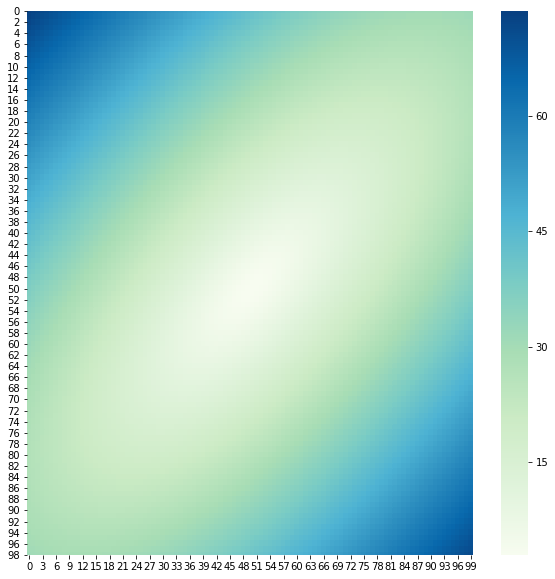

In [224]:
import seaborn as sns

fig = plt.figure(figsize=(10, 10))

X, Y = np.meshgrid(mult, mult)

norms = np.array(norms)
norms = norms.reshape(100,100)
sns.heatmap(norms, cmap='GnBu')

we can find in the center of the heatmap, the value is minimum, which means the smallest norm is produced by mult1 = 0 and mult2 = 0.

# Question A3

Recall the lecture 1 homework exercise where we used SVD to perform image compression (or low rank approximation of the corresponding matrix representing the grey scale version of the image) on a photo of our building.

Explain why the sum of the first $n$ singular values, as a fraction of the sum of all the singular values, can be used as a useful metric for how well the information in the image is represented by the low rank approximation.

For the Royal School of Mines image plot a cumulative sum of the singular values as a fraction of the sum of all singular values - how fast this fraction gets close to one can be used as a guide for how easy the image is to compress.

Try and find two additional images for which different behaviour in the cumulative sums of singular values plots can be seen - comment on what you observe.  [Note that flags are nice examples of images that can be relatively simple - consider using your home flag, or others that might be especially simple designs].

In [141]:
from PIL import Image
import matplotlib.pyplot as plt

In [142]:
def get_img_mat(filename):
    img_colour = Image.open(filename)
    # convert to grey scale
    img_grey = img_colour.convert('LA')
    img_mat = np.array(img_grey.getdata(band=0), float)
    img_mat.shape = (img_grey.size[1], img_grey.size[0])
    return img_mat

In [235]:
def get_cumulative(img_mat):
    U, sigma, VT = np.linalg.svd(img_mat)
    num_sigma = sigma.size
    sum_sigma = np.sum(sigma)
    x = []
    tmp_y = []
    tmp_sum = 0
    for i in range(num_sigma):
        tmp_sum += sigma[i]
        x.append(i)
        tmp_y.append(tmp_sum)
        y = tmp_y / sum_sigma
    
    return x, y

In [237]:
img_mat = get_img_mat('Imperial_College_Royal_School_of_Mines.jpg')
x1, y1 = get_cumulative(img_mat)
# find the SVD
U, sigma, VT = np.linalg.svd(img_mat)
sum_sigma = np.sum(sigma)
print('np.shape(U):', np.shape(U))
print('np.shape(sigma):', np.shape(sigma))
print('np.shape(VT):', np.shape(VT))
# asterisk to unpack the list of sigmas for nicer printing with the use of sep
print('\nFirst 5 singular values:', *list(sigma[:5]), sep='\n')
print('\nLast 5 singular values:', *list(sigma[-5:]), sep='\n')
print('\nFirst 5 ratio of singular values:', *list(sigma[:5])/sum_sigma, sep='\n')
print('\nLast 5 ratio of singular values:', *list(sigma[-5:])/sum_sigma, sep='\n')

np.shape(U): (1537, 1537)
np.shape(sigma): (1537,)
np.shape(VT): (2049, 2049)

First 5 singular values:
199090.65510410635
27820.53128996402
23734.838020060535
19129.847752697384
16970.415525317145

Last 5 singular values:
14.689568776811079
13.851676667207824
13.461902733926655
13.415391007708152
12.5180219468315

First 5 ratio of singular values:
0.13673115493002158
0.019106539038984384
0.01630057328839905
0.013137965594085999
0.011654914256048992

Last 5 ratio of singular values:
1.0088478051504169e-05
9.513031877032054e-06
9.245343571765874e-06
9.213400324402911e-06
8.597106666481231e-06


we know that the ratio of every singular value to sum of singular values represents thte approximation of the image.

so, the sum of first $n$ singular values, as a fraction of the sum of all the singular values represents the percentage of approximation of whole image.

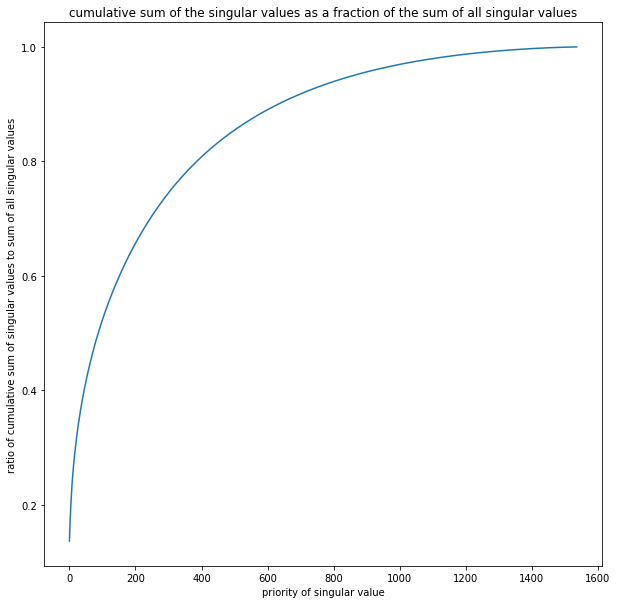

In [227]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(x1,y1)
ax.set_title("cumulative sum of the singular values as a fraction of the sum of all singular values")
ax.set_xlabel("priority of singular value")
ax.set_ylabel("ratio of cumulative sum of singular values to sum of all singular values");

In [145]:
img_mat = get_img_mat('alcatraz.jpg')
x2, y2 = get_cumulative(img_mat)
img_mat = get_img_mat('AquaTermi_lowcontrast.jpg')
x3, y3 = get_cumulative(img_mat)

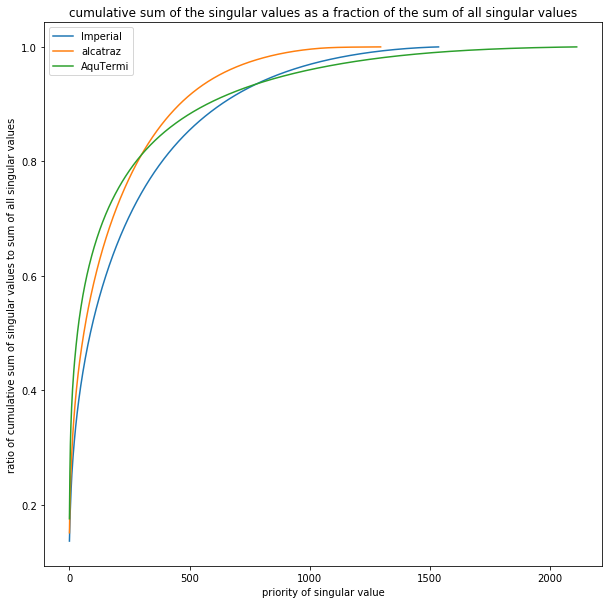

In [150]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(x1,y1,label="Imperial")
ax.plot(x2,y2,label="alcatraz")
ax.plot(x3,y3,label="AquTermi")
ax.set_title("cumulative sum of the singular values as a fraction of the sum of all singular values")
ax.set_xlabel("priority of singular value")
ax.set_ylabel("ratio of cumulative sum of singular values to sum of all singular values")
ax.legend();

we can find all curves are first increase fastly, then the acceleration is decreasing as the number of singular values increases